# THE DEPENDENCIES

In [1]:
import pandas as pd                  # for reading and wrtiting the dataset csv file
import numpy as np                     #for array formation
import seaborn as sns                   #for displaying bar graph
import matplotlib.pyplot as plt  #  for plotting


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve
from sklearn.metrics import recall_score,precision_recall_curve,precision_score,f1_score    # to find the F1-score,recall and precision
from sklearn.metrics import classification_report                                             #to generate the f1,recal and precision report
from sklearn.metrics import confusion_matrix                                                    #to find the TP,FP,TN,FN
from sklearn.ensemble import RandomForestClassifier                                     #we used RandomForrestClassifier
from sklearn.model_selection import train_test_split                                #for spliting the dataset

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


pd.pandas.set_option('display.max_columns',None)            #to display all the features

READING THE TRAINING DATASET

In [2]:
df=pd.read_csv('training_set.csv')       #loading the dataset csv
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,0.0,0.56,0.0,0.00,0.0,0.00,0.00,0.56,3.38,0.0,1.12,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,0.0,0.0,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,8.10,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,0.0,1.29,0.0,0.00,0.0,1.29,0.64,0.00,1.93,0.0,2.58,0.0,0.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,0.0,0.00,0.0,0.58,0.0,0.58,0.58,0.58,0.58,0.0,1.74,0.0,0.00,1.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


NO NULL VALUE EXIST

In [3]:
print(df.shape)
df.info()  #here the no null represent there is no null value exist in features

(3910, 59)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3910 non-null   int64  
 1   X1          3910 non-null   float64
 2   X2          3910 non-null   float64
 3   X3          3910 non-null   float64
 4   X4          3910 non-null   float64
 5   X5          3910 non-null   float64
 6   X6          3910 non-null   float64
 7   X7          3910 non-null   float64
 8   X8          3910 non-null   float64
 9   X9          3910 non-null   float64
 10  X10         3910 non-null   float64
 11  X11         3910 non-null   float64
 12  X12         3910 non-null   float64
 13  X13         3910 non-null   float64
 14  X14         3910 non-null   float64
 15  X15         3910 non-null   float64
 16  X16         3910 non-null   float64
 17  X17         3910 non-null   float64
 18  X18         3910 non-null   float64
 19  X19         3910

NOW WE SETTING UP X AS DATA WITH FEATURES AND Y AS LABEL OUTPUT OF 1,0 

In [4]:
x=df.iloc[:,1:58]    #x contain the features
y=df.iloc[:,-1]         #y contain the label
print(y)
x

0       0
1       1
2       0
3       1
4       1
       ..
3905    0
3906    0
3907    0
3908    1
3909    1
Name: Y, Length: 3910, dtype: int64


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,0.56,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.56,3.38,0.0,1.12,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.56,0.00,0.0,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.10,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,2.70,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,0.00,0.00,1.29,0.00,0.00,0.00,1.29,0.64,0.00,1.93,0.0,2.58,0.0,0.64,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,0.00,0.00,0.00,0.00,0.58,0.00,0.58,0.58,0.58,0.58,0.0,1.74,0.0,0.00,1.16,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.31,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12
3906,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,18.18,9.09,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4
3907,0.12,0.00,0.12,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.12,0.25,0.00,0.00,0.12,0.00,0.00,2.19,0.0,0.51,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.64,0.25,0.12,0.0,0.0,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131
3908,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,1.04,0.00,0.0,0.0,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81


# EDA(EXPLORATORY DATA ANALYSIS)

HISTOGRAM OF EVERY EXISTING FEATURE

[[<AxesSubplot:title={'center':'X1'}> <AxesSubplot:title={'center':'X2'}>
  <AxesSubplot:title={'center':'X3'}> <AxesSubplot:title={'center':'X4'}>
  <AxesSubplot:title={'center':'X5'}> <AxesSubplot:title={'center':'X6'}>
  <AxesSubplot:title={'center':'X7'}> <AxesSubplot:title={'center':'X8'}>]
 [<AxesSubplot:title={'center':'X9'}>
  <AxesSubplot:title={'center':'X10'}>
  <AxesSubplot:title={'center':'X11'}>
  <AxesSubplot:title={'center':'X12'}>
  <AxesSubplot:title={'center':'X13'}>
  <AxesSubplot:title={'center':'X14'}>
  <AxesSubplot:title={'center':'X15'}>
  <AxesSubplot:title={'center':'X16'}>]
 [<AxesSubplot:title={'center':'X17'}>
  <AxesSubplot:title={'center':'X18'}>
  <AxesSubplot:title={'center':'X19'}>
  <AxesSubplot:title={'center':'X20'}>
  <AxesSubplot:title={'center':'X21'}>
  <AxesSubplot:title={'center':'X22'}>
  <AxesSubplot:title={'center':'X23'}>
  <AxesSubplot:title={'center':'X24'}>]
 [<AxesSubplot:title={'center':'X25'}>
  <AxesSubplot:title={'center':'X26'}>


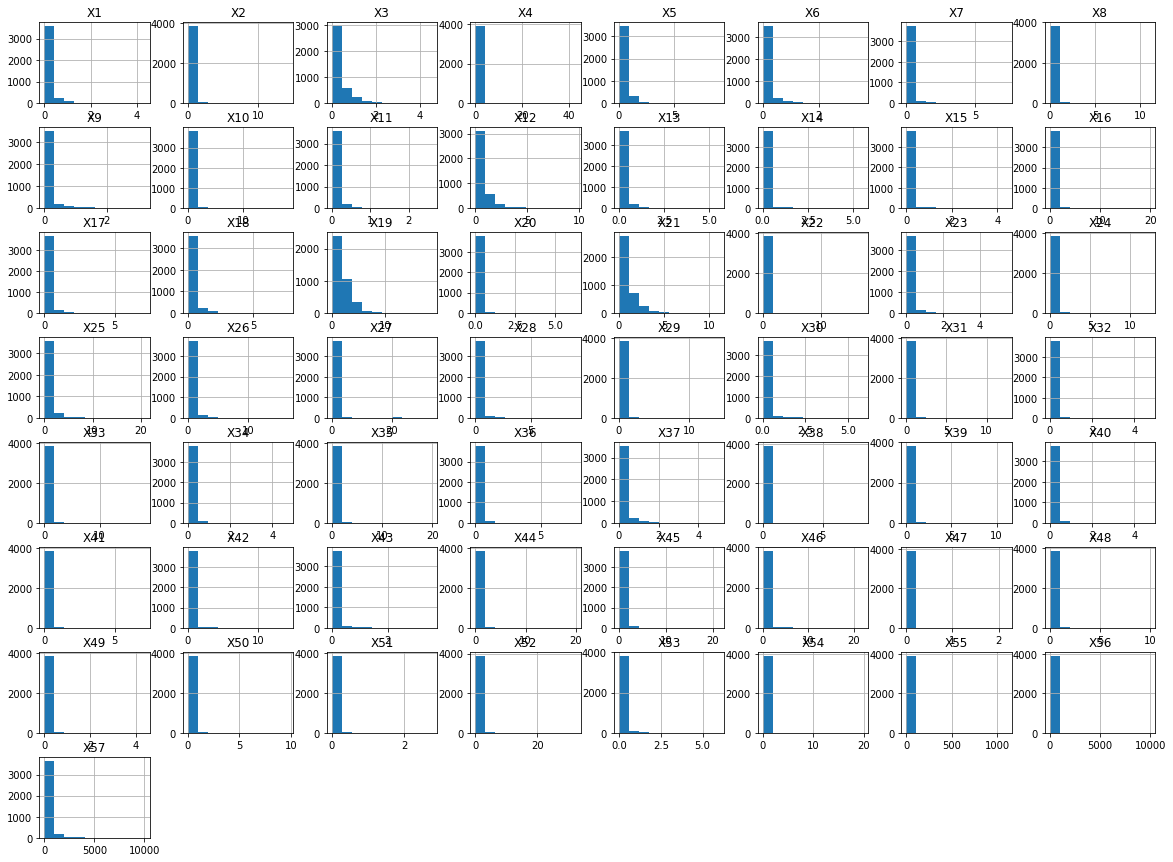

In [5]:
print(x.hist(bins=10,figsize=(20,15)))  # here it shows the range of values per features

Y OUTPUT LABEL GRAPH

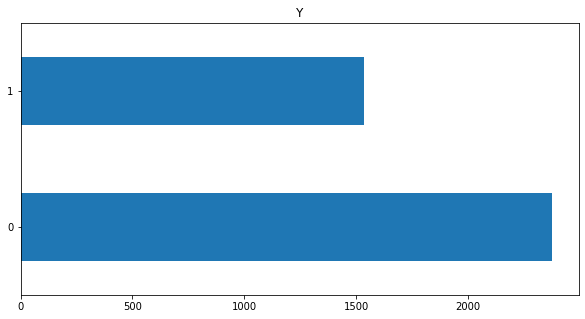

In [6]:
plt.figure(figsize=(10, 5))
y.value_counts().plot(kind='barh')
plt.title('Y')
plt.show()                      #  total 1 label and 0 label

# NOW WE WILL SPLIT THE DATA INTO RATIO OF 4:1 WHICH MEANS 80%,20%

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)  #here we are spliiting the dataset into the 4:1 ratio

In [8]:
print(X_train.shape)
print(X_test.shape)

(3128, 57)
(782, 57)


# FEATURE SELECTION

NOW WE WILL USE CORRELATION MATRIX TO FIND THE HIGH CORRELATED FEATURES AND REMOVE THEM

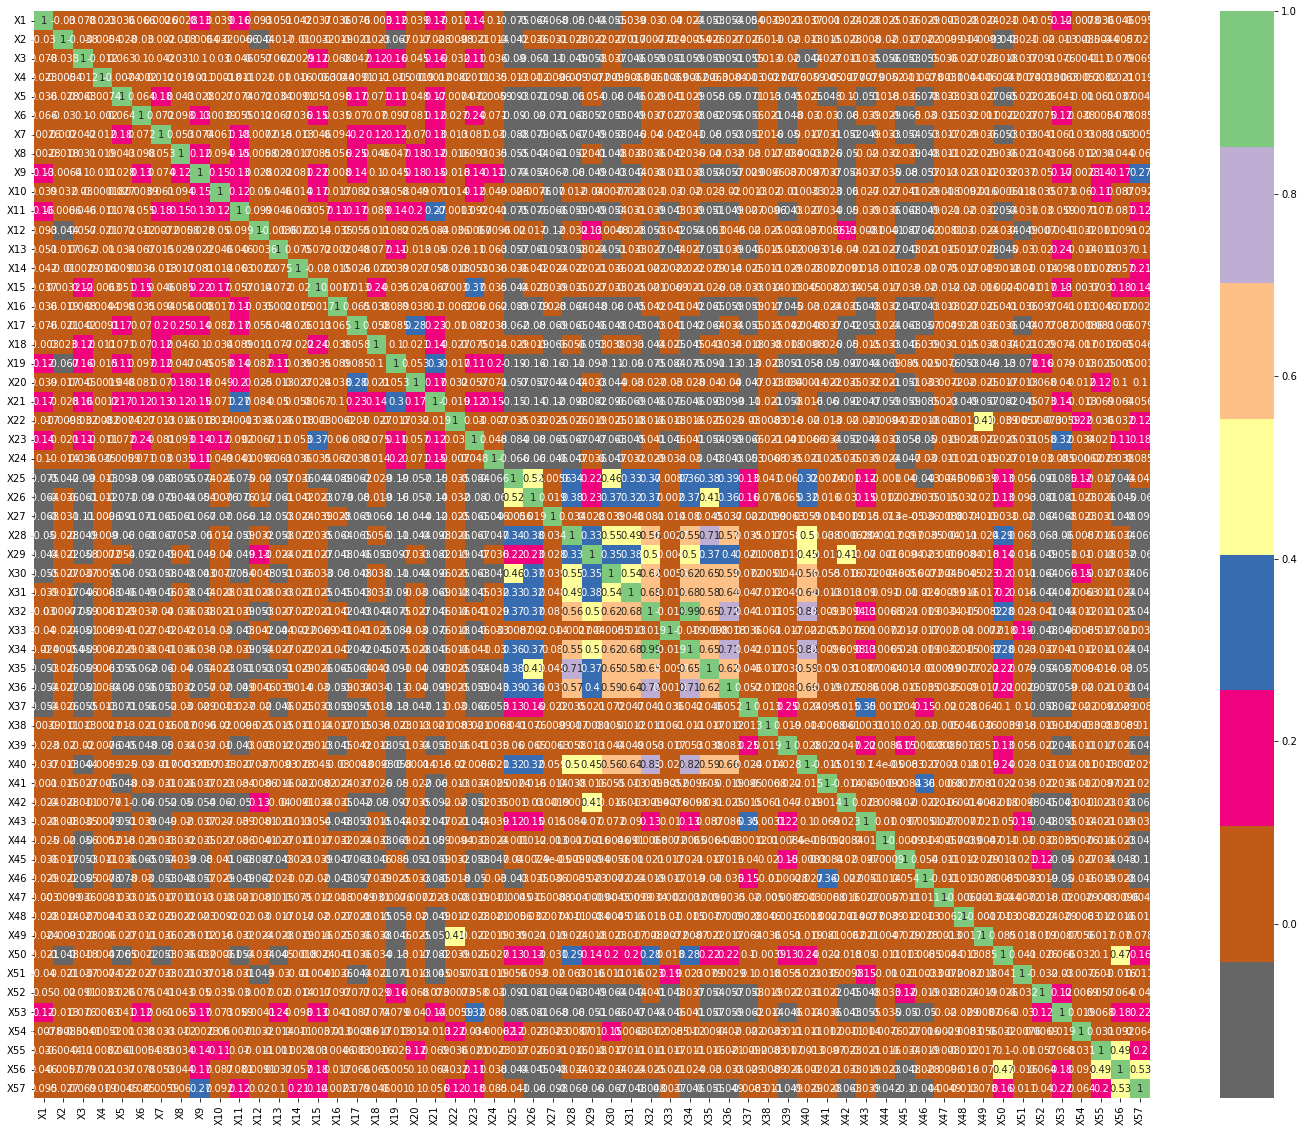

In [9]:
plt.figure(figsize=(25,20))
corr_matrix=X_train.corr()
sns.heatmap(corr_matrix,annot=True,cmap=plt.cm.Accent_r)   # now we finding the Correlation features
plt.show()

# REMOVING THE HIGH CORR FUNCTIONS

In [10]:
##for removing the higly correlated features
def highcorrelated(data,threshold):
    feature_corr=set()
    matrix=data.corr()
    for i in range(len(matrix.columns)):
        for j in range(i):
            if abs(matrix.iloc[i,j])>threshold:
                column_name=matrix.columns[i]
                feature_corr.add(column_name)
    return feature_corr


In [11]:
high_feature=highcorrelated(X_train,0.5)  #threshold of correlation

NOW WE WILL REMOVE THOSE FEATURES FROM TRAING AND TESTING BOTH BUT REMEMBER NEVER TO APLLY FUNCTION  IN TESTING TO AVOID OVERFITTING

In [12]:
X_train=X_train.drop(high_feature,axis=1)
X_test=X_test.drop(high_feature,axis=1)

# SPLIT DATA FEATURE ANALYSIS

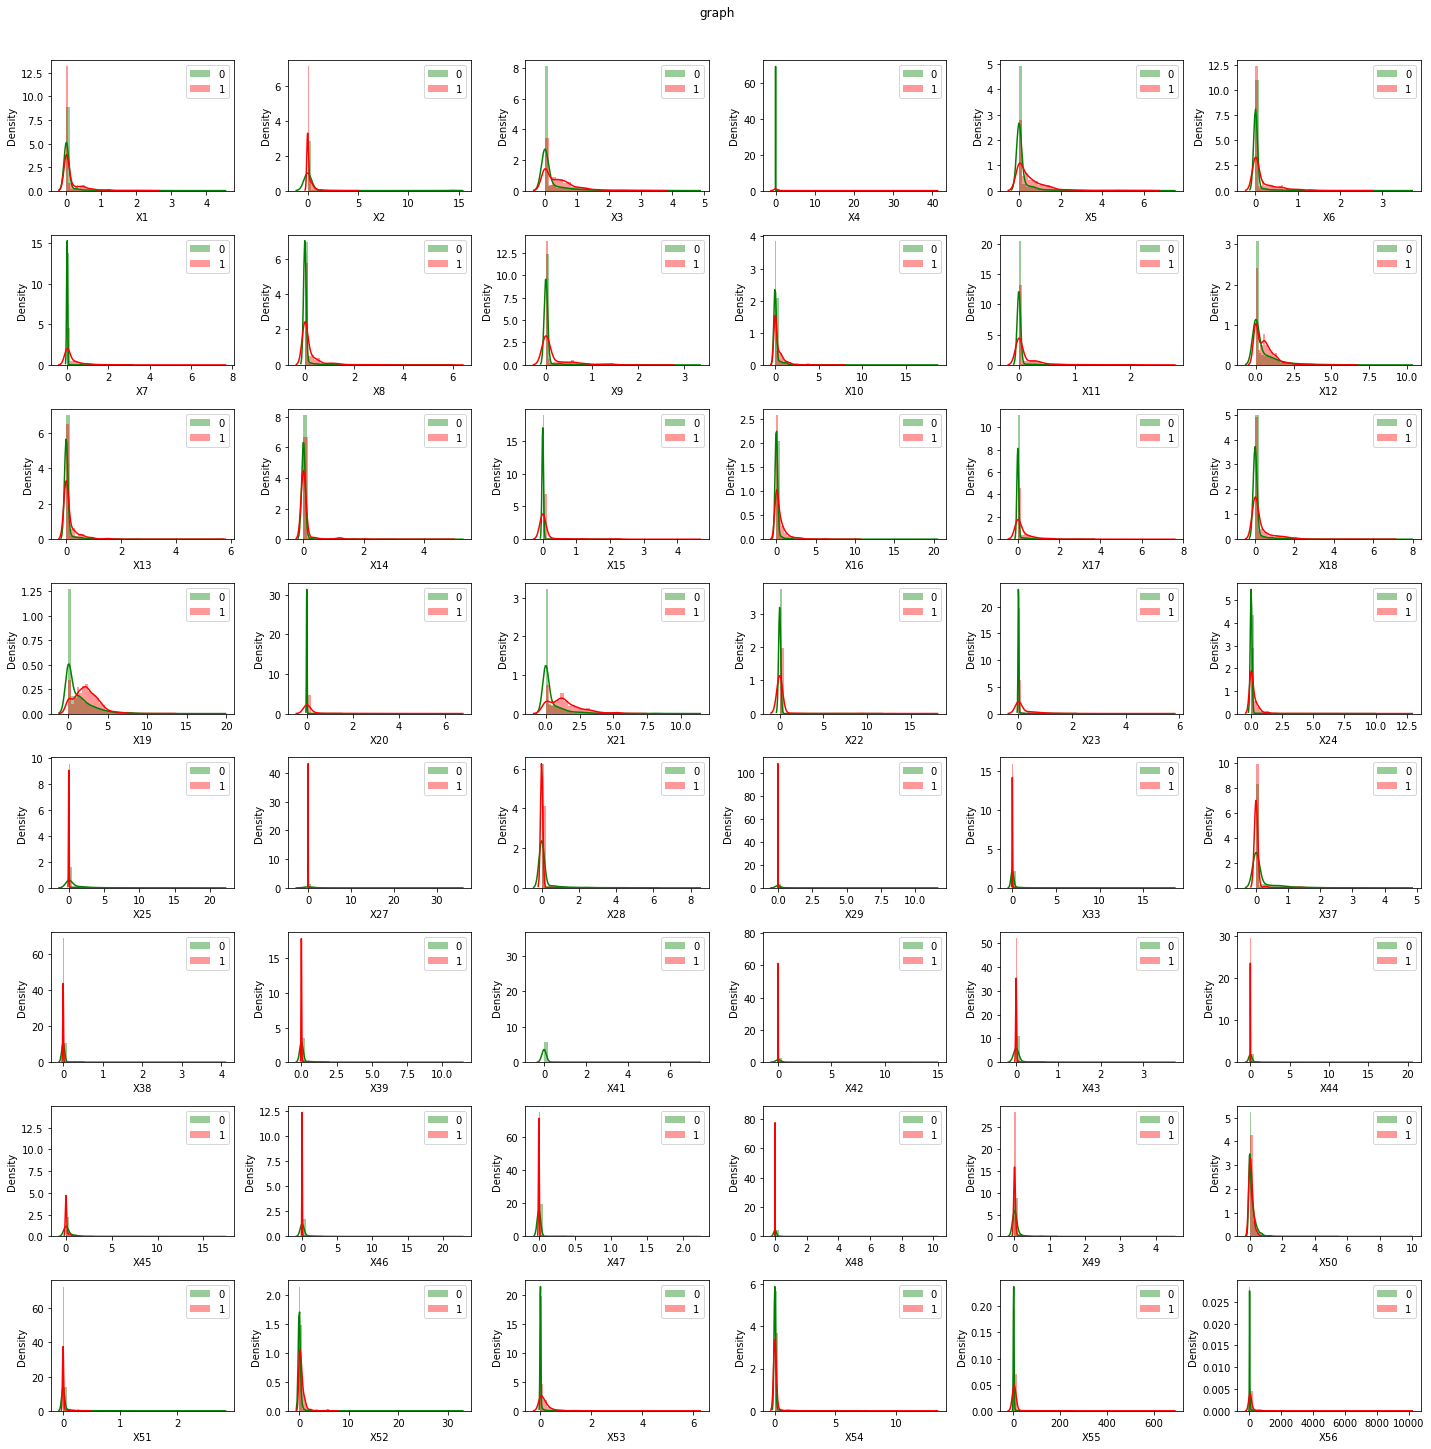

In [13]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in X_train.columns:
    plt.subplot(10,6, j+1)
    j += 1
    sns.distplot(X_train[i][y_train==0], color='g', label = '0')
    sns.distplot(X_train[i][y_train==1], color='r', label = '1')
    plt.legend(loc='best')
fig.suptitle('graph')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()
#now the split data show case value range with respect to Label

# DATA PREPROCESSING

NOW WE WILL USE THE STANDARD SCALLER IN THE TRAING AND TESTING DATASET 

In [14]:
stnd=StandardScaler()
X_train=stnd.fit_transform(X_train)
X_test=stnd.fit_transform(X_test)

# APPLYING THE RANDOMFORREST CLASSIFIER

In [15]:
model_rf=RandomForestClassifier(n_estimators=100)  # RandomForrest Classifier


NOW WE GOT THE MODEL AND WE HAVE TO FIT THE TRAINING DATA AND START TRAINING

In [16]:
model_rf.fit(X_train,y_train)     #LEARNING FROM TRAINING DATASET 
predict=model_rf.predict(X_test)  #PREDICTING WITH THE TEST DATASET

# CLASSIFICATION REPORT 

In [17]:
print(classification_report(y_test,predict, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.93      0.98      0.96       473
           1       0.97      0.89      0.93       309

    accuracy                           0.95       782
   macro avg       0.95      0.94      0.94       782
weighted avg       0.95      0.95      0.95       782



# CONFUSION MATRIX

In [18]:
print(confusion_matrix(y_test,predict)) #CONTAIN TRUEPOSITIVE,TRUENEGATIVE,FALSEPOSITIVE,FALSENEGATIVE

[[464   9]
 [ 33 276]]


# PRECISION SCORE

In [19]:
precision_score(y_test,predict)

0.968421052631579

# RECALL SCORE

In [20]:
recall_score(y_test,predict)

0.8932038834951457

# F-1 SCORE

In [21]:
f1_score(y_test,predict)

0.9292929292929294

# PLOTTING THE PRECISION_RECALL CURVE

In [22]:
precision,recall,threshold=precision_recall_curve(y_test,predict)

REMEMBER THE PRECISION AND RECALL ARE INVERSELY PROPORTIONAL TO EACH OTHER IT IS ALSO CALL PRECISION-RECALL TRADEOFF

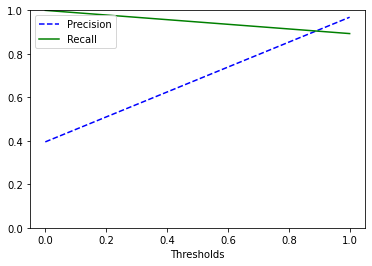

In [23]:

plt.plot(threshold,precision[:-1],"b--", label="Precision")
plt.plot(threshold,recall[:-1], "g-", label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()

# ROC CURVE PLOT

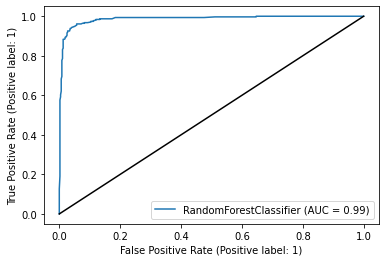

In [24]:
plot_roc_curve(model_rf, X_test, y_test)
plt.plot([0,1], [0,1], c='k')

# NOW ON TEST CSV

In [25]:
testdf=pd.read_csv('test_set.csv')

In [26]:

finaldf=testdf.drop(high_feature,axis=1)
finaldf=finaldf.iloc[:,1:58]

In [27]:
output=model_rf.predict(finaldf)#

In [28]:
testdf['Y']=model_rf.predict(finaldf)

In [29]:
testdf.to_csv('test_set.csv')

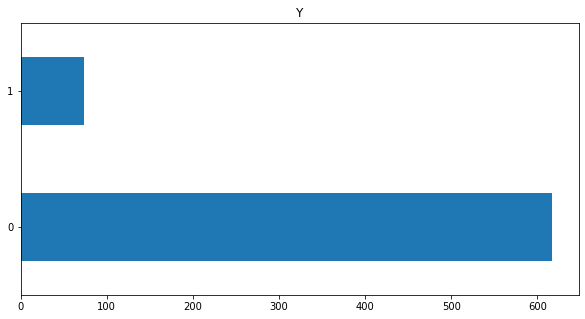

In [33]:
# checking the output lalel


plt.figure(figsize=(10, 5))
testdf['Y'].value_counts().plot(kind='barh')
plt.title('Y')
plt.show() 

# TO STORE AS JOBLIB FILE

In [ ]:
from joblib import dump, load
dump(model, 'arya.joblib') 